Plots: InversionPlotter
=======================

This example illustrates how to plot a `Inversion` using a `InversionPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example imaging of of a strong lens as an `Imaging` object.

In [2]:
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", "imaging", "no_lens_light", dataset_name)

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.1,
)

We now mask the `Imaging` data so we can fit it with an `Inversion`.

In [3]:
mask = al.Mask2D.circular_annular(
    shape_native=imaging.shape_native,
    pixel_scales=imaging.pixel_scales,
    inner_radius=0.3,
    outer_radius=3.0,
)
imaging = imaging.apply_mask(mask=mask)

The `Inversion` maps pixels from the image-plane of our `Imaging` data to its source plane, via a lens model.

Lets create a `Tracer` which we will use to create the `Inversion`.

In [4]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), elliptical_comps=(0.111111, 0.0), einstein_radius=1.6
    ),
)
source_galaxy = al.Galaxy(
    redshift=1.0,
    pixelization=al.pix.VoronoiMagnification(shape=(25, 25)),
    regularization=al.reg.Constant(coefficient=1.0),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We can extract the `Inversion` from the `Tracer` by passing it the imaging data.

In [5]:
inversion = tracer.inversion_imaging_from_grid_and_data(
    grid=imaging.grid,
    image=imaging.image,
    noise_map=imaging.noise_map,
    convolver=imaging.convolver,
)

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numba/core/ir_utils.py:2067: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'slim_indexes' of function 'furthest_grid_2d_slim_index_from'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../PyAutoArray/autoarray/structures/grids/two_d/grid_2d_util.py", line 675:
@decorator_util.jit()
def furthest_grid_2d_slim_index_from(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


We now pass the inversion to a `InversionPlotter` and call various `figure_*` methods to plot different attributes.

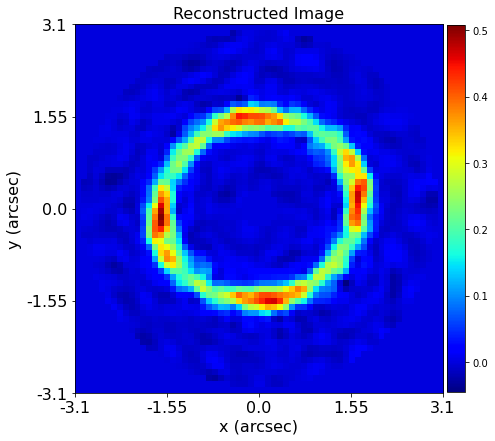

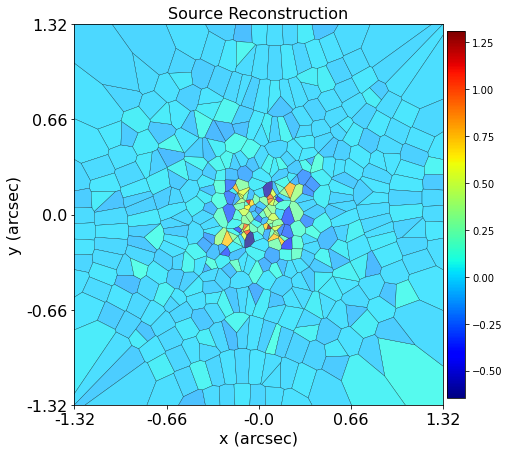

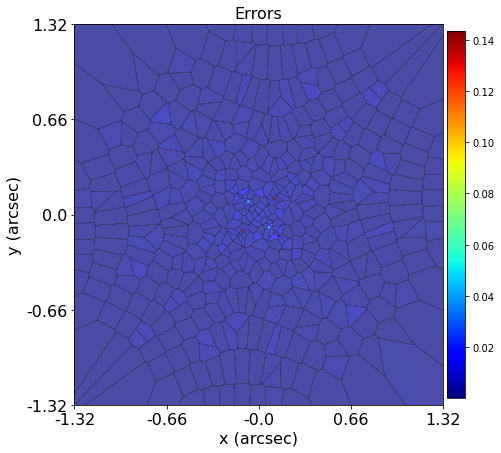

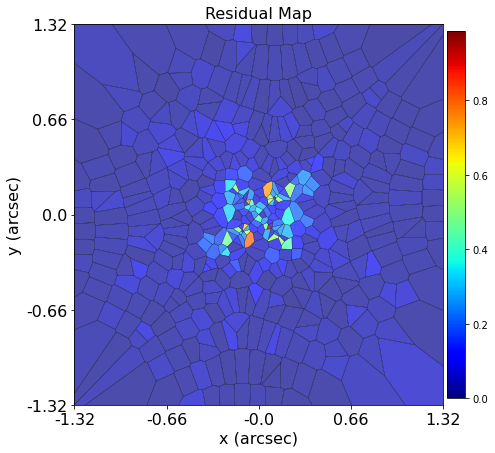

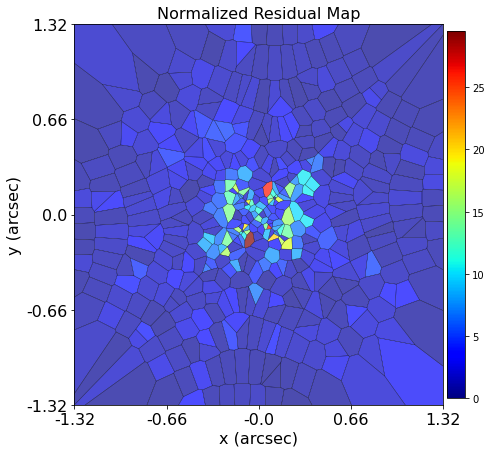

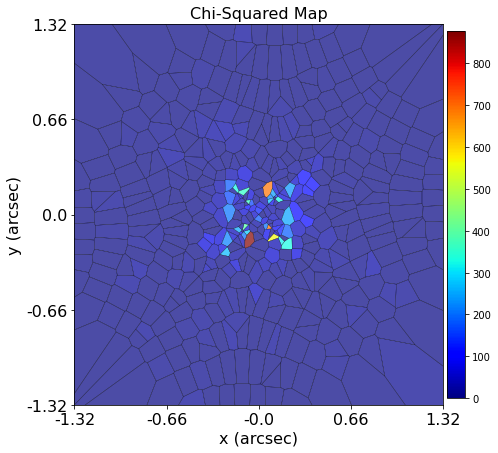

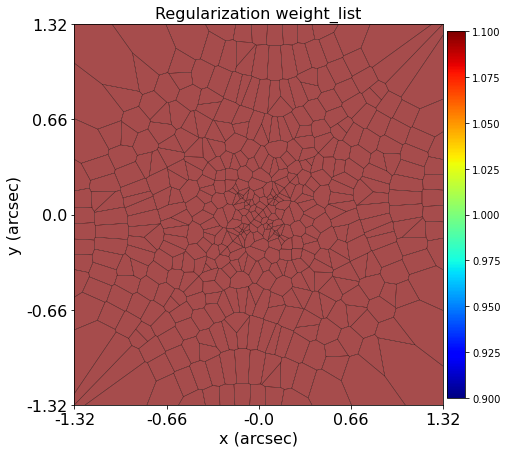

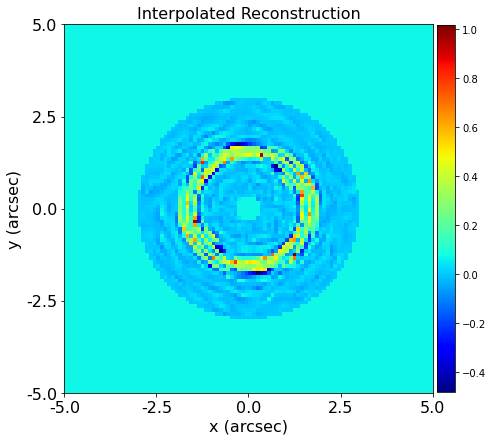

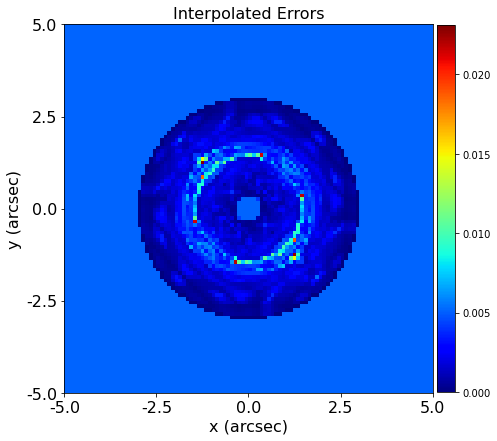

In [6]:
inversion_plotter = aplt.InversionPlotter(inversion=inversion)
inversion_plotter.figures_2d(
    reconstructed_image=True,
    reconstruction=True,
    errors=True,
    residual_map=True,
    normalized_residual_map=True,
    chi_squared_map=True,
    regularization_weight_list=True,
    interpolated_reconstruction=True,
    interpolated_errors=True,
)

The `Inversion` attributes can also be plotted as a subplot.

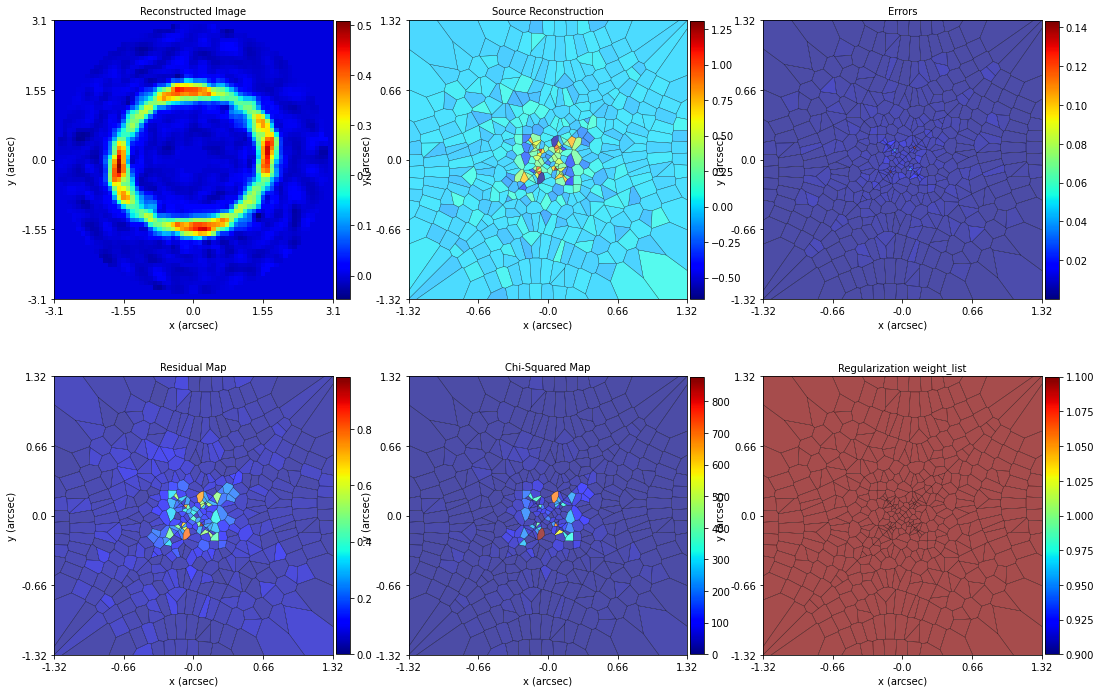

In [7]:
inversion_plotter = aplt.InversionPlotter(inversion=inversion)
inversion_plotter.subplot_inversion()

Inversion`'s have their own unique attributes that can be plotted via the `Include2D` class:

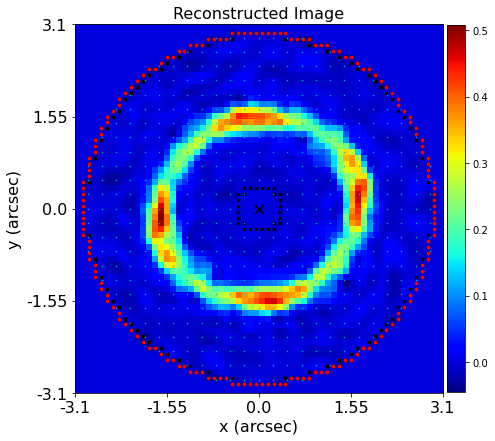

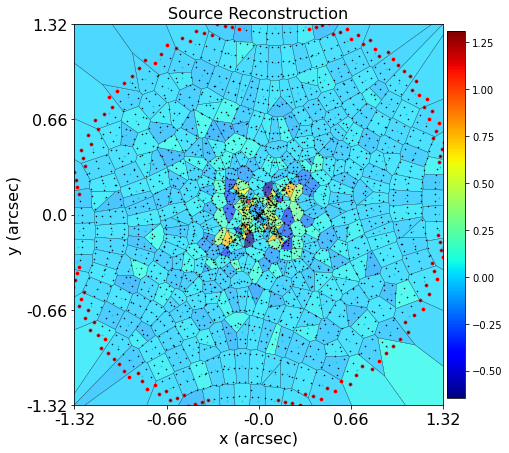

In [8]:
include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    mapper_data_pixelization_grid=True,
    mapper_source_pixelization_grid=True,
    mapper_source_grid_slim=True,
)

inversion_plotter = aplt.InversionPlotter(inversion=inversion, include_2d=include_2d)
inversion_plotter.figures_2d(reconstructed_image=True, reconstruction=True)

Finish.